## Bar chart with gradients

Matplotlib does not natively support gradients. However, we can emulate a gradient-filled rectangle by an [AxesImage](https://matplotlib.org/api/image_api.html#matplotlib.image.AxesImage) of the right size and coloring.

In particular, we use a colormap to generate the actual colors. It is then sufficient to define the underlying values on the corners of the image and let bicubic interpolation fill out the area. We define the gradient direction by a unit vector v. The values at the corners are then obtained by the lengths of the projections of the corner vectors on v.

A similar approach can be used to create a gradient background for an axes. In that case, it is helpful to uses Axes coordinates (extent=(0, 1, 0, 1), transform=ax.transAxes) to be independent of the data coordinates.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(19680801)

In [3]:
# Function to draw a gradient image based on a colormap

def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im

In [4]:
# Function to draw gradient bars

def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))

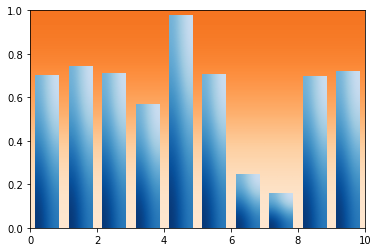

In [5]:
# Usage

xmin, xmax = xlim = 0, 10
ymin, ymax = ylim = 0, 1

fig, ax = plt.subplots()
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

# background image
gradient_image(ax, direction=0, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.Oranges, cmap_range=(0.1, 0.6))

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
gradient_bar(ax, x, y, width=0.7)
ax.set_aspect('auto')
plt.show()

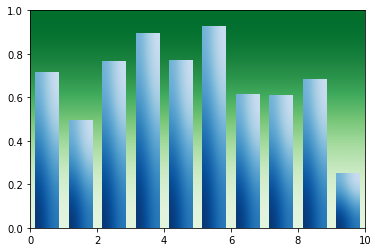

In [11]:
# Changing the color and cmap_range

xmin, xmax = xlim = 0, 10
ymin, ymax = ylim = 0, 1

fig, ax = plt.subplots()
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

# background image
gradient_image(ax, direction=0, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.Greens, cmap_range=(0.1, 0.9))

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
gradient_bar(ax, x, y, width=0.7)
ax.set_aspect('auto')
plt.show()